# Simple Random sampling imputation  (SRSI)
Simple random sampling imputation (SRSI) samples are randomly drawn from the dataset for imputing the missing value. ... The mean imputation reduces the variance of the distribution which is also a negative impact

Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the NaN values.

### When to use it?
It assumes that the data are missing completely at random(MCAR)

## Numerical

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('/home/saad/Downloads/tested.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [3]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [4]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [7]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [8]:
X_train.head()

,Age,Fare,Age_imputed
336,32.0,13.0000,32.0
31,24.0,31.5000,24.0
84,NaN,10.7083,21.0
287,24.0,82.2667,24.0
317,19.0,10.5000,19.0


In [9]:
# Let's check the distribution

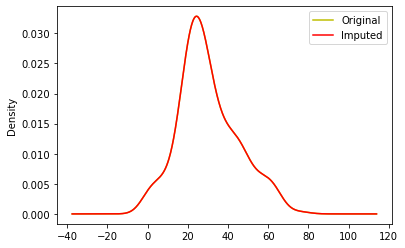

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde', ax=ax, label='Original', color='y') # original data
X_train['Age'].plot(kind='kde', ax=ax, color='r', label='Imputed') # imputed data
plt.legend()
plt.show()

In [11]:
# Let's check the variance
print("Original variance of Age: ", X_train['Age'].var())
print("Imputed variance of Age: ",X_train['Age_imputed'].var())

Original variance of Age:  214.7917455836333
Imputed variance of Age:  214.87405636744543


In [12]:
# Lets check the correlation
X_train[['Fare','Age','Age_imputed']].corr()

,Fare,Age,Age_imputed
Fare,1.000000,0.349069,0.301249
Age,0.349069,1.000000,1.000000
Age_imputed,0.301249,1.000000,1.000000


<AxesSubplot:>

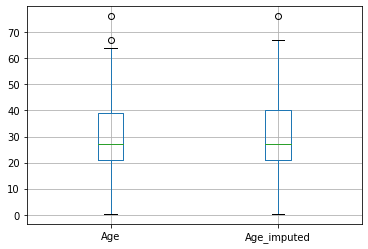

In [13]:
#sns.set_theme(style='darkgrid')
X_train.boxplot(column=['Age','Age_imputed'])

In [14]:
# While making production based project we should always remember that if i provide the age base featutre on 
# random sampling base model and i also give the fare feature so when my model ready the fare values randomly
# and age too so it works well. but, when a user provide same value to model for Fare in this time my model
# select the value for Age is randomly it will not be the same as previous value
# so for avoiding this thing we must use the following code so when the user provide the
# same value for Fare then my model also select the value for Age same as previous value

In [15]:
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

## Categorical

In [16]:
pd.set_option('display.max_columns',None)

In [17]:
df = pd.read_csv('/home/saad/Downloads/train.csv', usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [18]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [19]:
X = df
y = df['SalePrice']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [22]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

In [23]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,FireplaceQu_imputed,GarageQual_imputed
792,TA,TA,269790,TA,TA
1418,NaN,TA,124000,NaN,TA
96,NaN,TA,214000,NaN,TA
1355,TA,TA,170000,TA,TA
356,NaN,TA,173000,NaN,TA


In [24]:
X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()]=X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()]=X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values


X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()]=X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

In [25]:
X_train

,FireplaceQu,GarageQual,SalePrice,FireplaceQu_imputed,GarageQual_imputed
254,NaN,TA,145000,TA,TA
1066,TA,TA,178000,TA,TA
638,NaN,NaN,85000,Gd,TA
799,TA,TA,175000,TA,TA
380,Gd,TA,127000,Gd,TA
...,...,...,...,...,...
1095,Gd,TA,176432,Gd,TA
1130,TA,TA,135000,TA,TA
1294,NaN,TA,115000,Gd,TA
860,Gd,TA,189950,Gd,TA


In [26]:
temp = pd.concat([
    X_train['FireplaceQu'].value_counts()/len(X_train['FireplaceQu'].dropna()),
    X_train['FireplaceQu_imputed'].value_counts()/len(X_train['FireplaceQu'])
], axis=1)

temp.columns = ['Original','Imputed']

In [27]:
temp

,Original,Imputed
Gd,0.491143,0.489726
TA,0.405797,0.405822
Fa,0.043478,0.046233
Ex,0.033816,0.034247
Po,0.025765,0.023973


In [28]:
temp2 = pd.concat([
    X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
    X_train['GarageQual_imputed'].value_counts()/len(X_train['GarageQual_imputed'])
], axis=1)

temp2.columns = ['Original','Imputed']

In [29]:
temp2

,Original,Imputed
TA,0.951087,0.952055
Fa,0.032609,0.031678
Gd,0.011775,0.011986
Ex,0.002717,0.002568
Po,0.001812,0.001712


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

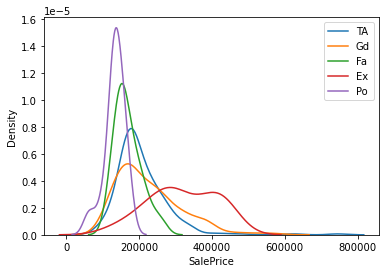

In [31]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu']==category]['SalePrice'], hist=False, label=category)
    plt.legend()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

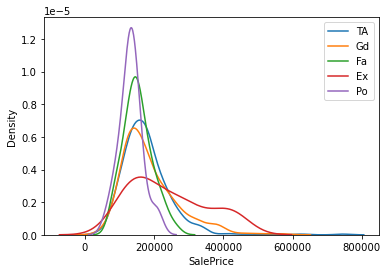

In [32]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed']==category]['SalePrice'], hist=False, label=category)
    plt.legend()